<a href="https://colab.research.google.com/github/khoirulfaizin21/ai-job-analysis/blob/main/ai_job_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 AI Job Market Analysis

*Date: 2025-06-08*

Analisis data lowongan kerja AI global berdasarkan dataset berisi 15.000 entri. Tujuan utama adalah menemukan insight terkait gaji, keterampilan yang dibutuhkan, tipe pekerjaan, dan tren lainnya yang berguna bagi pencari kerja maupun perusahaan.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset /ai_job_dataset.csv')
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


<ipython-input-6-545b6a96cef0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='Set2')


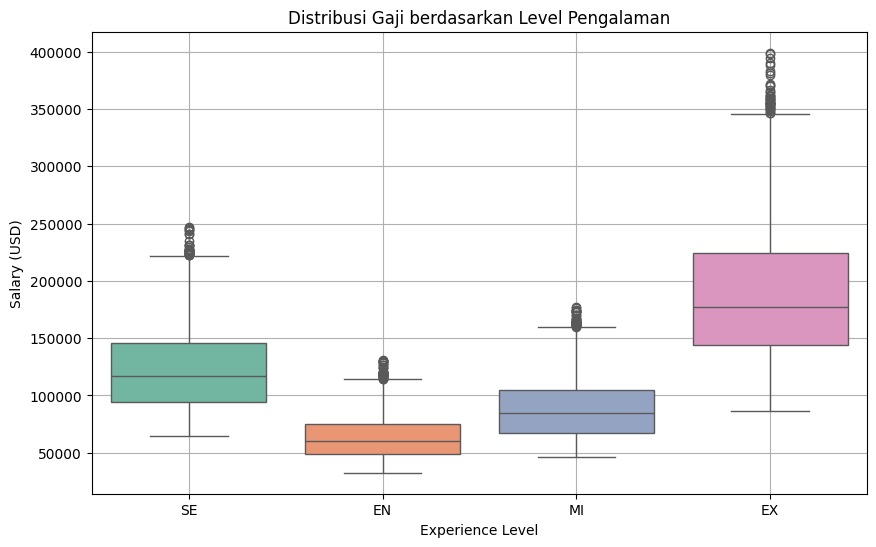

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='Set2')
plt.title('Distribusi Gaji berdasarkan Level Pengalaman')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.grid(True)
plt.show()

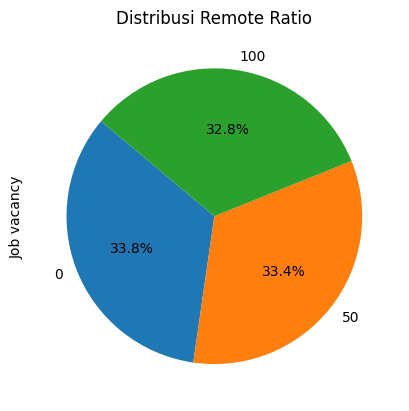

In [22]:
remote_counts = df['remote_ratio'].value_counts().sort_index()
remote_counts.plot(kind='pie', title='Distribusi Remote Ratio', ylabel='Job vacancy', autopct='%1.1f%%', startangle=140)

plt.show()

<ipython-input-7-83ff020147c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df, y='Skill', x='Frequency', palette='magma')


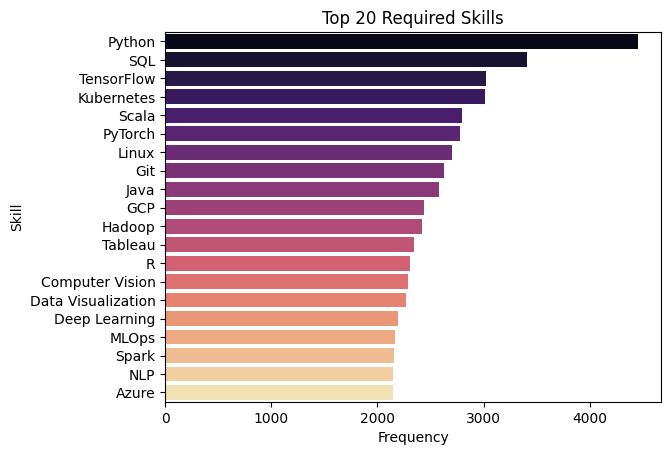

In [7]:
# Ekstrak skill
from collections import Counter

skills = df['required_skills'].str.split(', ').sum()
skill_counts = Counter(skills)

# Top 20 skill
skill_df = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Frequency'])
sns.barplot(data=skill_df, y='Skill', x='Frequency', palette='magma')
plt.title('Top 20 Required Skills')
plt.show()

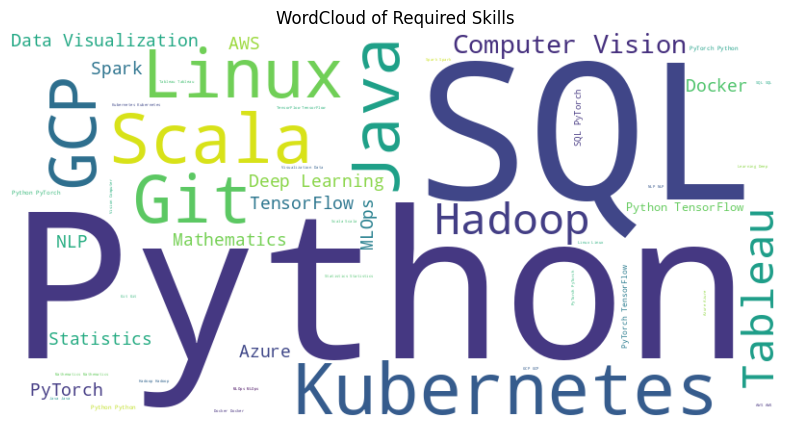

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(', '.join(skills))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Required Skills')
plt.show()

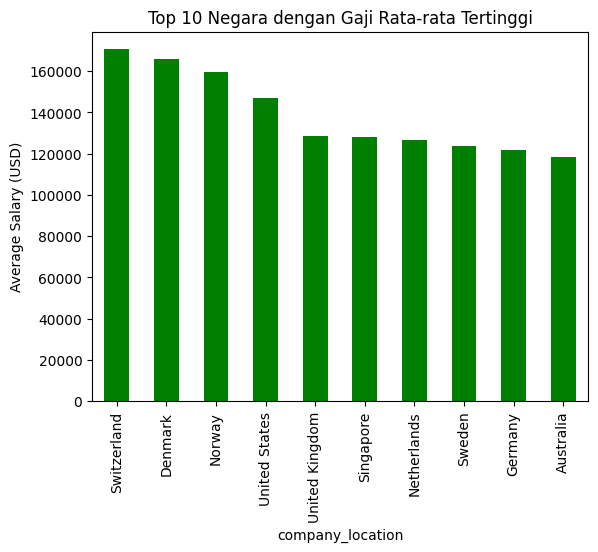

In [9]:
top_countries = df.groupby('company_location')['salary_usd'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', title='Top 10 Negara dengan Gaji Rata-rata Tertinggi', ylabel='Average Salary (USD)', color='green')
plt.show()

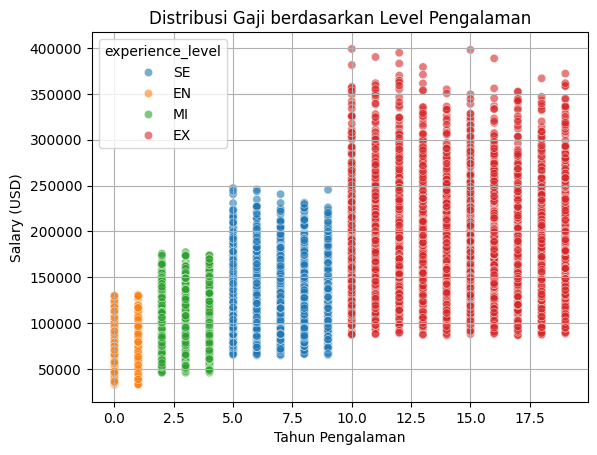

In [21]:
sns.scatterplot(data=df, x='years_experience', y='salary_usd', hue='experience_level', alpha=0.6)
plt.title('Distribusi Gaji berdasarkan Level Pengalaman')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Salary (USD)')
plt.grid(True)
plt.show()